In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [131]:
df = pd.read_csv('data/heart.csv', usecols=['sex', 'cp', 'restecg000', 'exang', 'slope', 'thal', 'target000'])

In [132]:
df.head()

,sex,cp,restecg000,exang,slope,thal,target000
0,1,3,0,0,0,1,1
1,1,2,1,0,0,2,1
2,0,1,0,0,2,2,1
3,1,1,1,0,2,2,1
4,0,0,1,1,2,2,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
sex           303 non-null int64
cp            303 non-null int64
restecg000    303 non-null int64
exang         303 non-null int64
slope         303 non-null int64
thal          303 non-null int64
target000     303 non-null int64
dtypes: int64(7)
memory usage: 16.7 KB


In [134]:
df.describe()

,sex,cp,restecg000,exang,slope,thal,target000
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.528053,0.326733,1.399340,2.313531,0.544554
std,0.466011,1.032052,0.525860,0.469794,0.616226,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000
max,1.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f771a153588>,
      dtype=object)

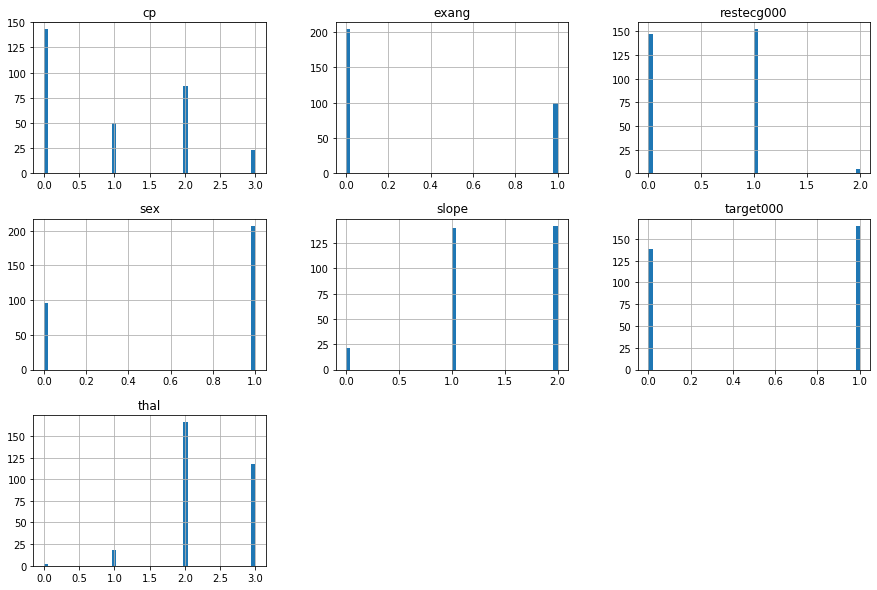

In [135]:
df.hist(bins=50, figsize=(15, 10))

In [136]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Uczące", len(train_set), ", testowe", len(test_set))

Uczące 242 , testowe 61


In [137]:
train_labels = train_set.target000
train_set.drop("target000", axis=1, inplace=True)
test_labels = test_set.target000
test_set.drop("target000", axis=1, inplace=True)

In [138]:
X = train_set.values
d = train_labels.values

# Progowa unipolarna

In [140]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        if x > 0:
            return 1
        else:
            return 0
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [142]:
perceptron = Perceptron(input_size=6)
perceptron.fit(X, d)
print(perceptron.W)

[ 2. -5.  6.  2. -6.  4. -4.]


# Progowa bipolarna

In [143]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        if x > 0:
            return 1
        else:
            return - 1
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [144]:
perceptron = Perceptron(input_size=6)
perceptron.fit(X, d)
print(perceptron.W)

[ 4. -2.  8.  4. -4. -2. -2.]


# Sigmoidalna unipolarna

In [174]:
import math

In [184]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100, parameter=1):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
        self.parameter = parameter
    
    def activation_fn(self, x):
        return 1 / (1 + math.e ** (self.parameter * - x))
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [206]:
perceptron = Perceptron(input_size=6, parameter=55)
perceptron.fit(X, d)
print(perceptron.W)

[ 5. -2.  4.  2. -1.  0. -2.]


# Tangens hiperboliczny

In [190]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100, parameter=1):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
        self.parameter = parameter
    
    def activation_fn(self, x):
        return math.tanh((self.parameter * x) / math.e)
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [205]:
perceptron = Perceptron(input_size=6, parameter=55)
perceptron.fit(X, d)
print(perceptron.W)

[ 5. -2.  4.  2. -1.  0. -2.]
